<a href="https://colab.research.google.com/github/Aurin-03/CSE4238-SoftComputingLab/blob/main/4238.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def parser (x):
  return datetime.strptime(x, '%Y %m')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/softcom/SoftComLab - Final.csv",
    parse_dates = [['Year', 'Month']],
    date_parser = parser,
    index_col = 0)
df.drop ('SL.', axis = 1, inplace = True)
df.columns = ['station','max_temp', 'min_temp','rainfall','cloud', 'humidity', 'wind_speed','sunshine'] #rename
df.index.name = 'date'
#dataset.to_csv ('/content/drive/MyDrive/softcom/main.csv')
df.head()

,station,max_temp,min_temp,rainfall,cloud,humidity,wind_speed,sunshine
date,,,,,,,,
2000-01-01,Dhaka (11111),24.58,13.99,13.0,0.87,71.87,0.49,6.14
2000-02-01,Dhaka (11111),25.48,16.16,44.0,3.21,61.24,0.57,5.79
2000-03-01,Dhaka (11111),30.94,20.66,172.0,2.81,63.06,0.79,8.52
2000-04-01,Dhaka (11111),32.79,23.47,189.0,3.93,73.40,1.52,8.43
2000-05-01,Dhaka (11111),32.28,24.11,471.0,5.45,77.77,0.94,5.20


In [ ]:
dataset =pd.read_csv (
   '/content/drive/MyDrive/softcom/main.csv'
    )

dataset.columns = ['date','station','max_temp', 'min_temp','rainfall','cloud', 'humidity', 'wind_speed','sunshine']

In [ ]:
dataset.head()

,date,station,max_temp,min_temp,rainfall,cloud,humidity,wind_speed,sunshine
0,2000-01-01,Dhaka,24.58,13.99,13.0,0.87,71.87,0.49,6.14
1,2000-02-01,Dhaka,25.48,16.16,44.0,3.21,61.24,0.57,5.79
2,2000-03-01,Dhaka,30.94,20.66,172.0,2.81,63.06,0.79,8.52
3,2000-04-01,Dhaka,32.79,23.47,189.0,3.93,73.40,1.52,8.43
4,2000-05-01,Dhaka,32.28,24.11,471.0,5.45,77.77,0.94,5.20


In [ ]:
columns_to_describe = ['max_temp', 'min_temp','rainfall', 'humidity']

station_descriptions = dataset.groupby('station')[columns_to_describe].describe()

print(station_descriptions)

           max_temp                                                        \
              count       mean       std    min      25%     50%      75%   
station                                                                     
Barisal       276.0  31.019275  2.687983  23.93  29.7325  31.820  32.8425   
Chittagong    276.0  30.704529  2.165653  24.73  29.7850  31.255  32.2525   
Dhaka         276.0  30.967029  3.085799  21.76  29.4150  32.085  33.0725   
Khulna        276.0  31.513152  3.213439  23.85  29.6550  32.640  33.5725   
Mymensingh    276.0  29.990543  2.866154  21.78  28.3775  31.125  32.0675   
Rajshahi      276.0  31.502283  3.911940  21.80  29.0875  32.930  34.1425   
Rangpur       276.0  29.824855  3.300884  20.27  28.0275  31.090  32.2125   
Sylhet        276.0  30.702681  2.483827  24.08  29.4750  31.420  32.5925   

                  min_temp             ... rainfall         humidity  \
              max    count       mean  ...      75%     max    count   
station 

<ipython-input-18-8d5f77fd0cb2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dataset.corr(method = 'pearson')#linear correlation to see ....


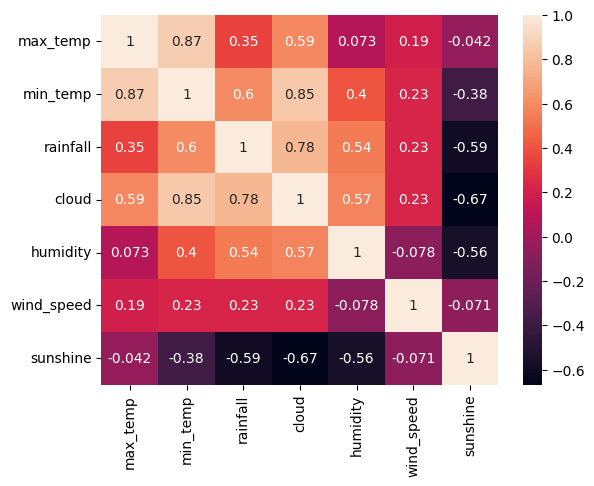

In [18]:
corrmat = dataset.corr(method = 'pearson')#linear correlation to see ....
g = sns.heatmap(corrmat,annot=True)

In [ ]:
df.isna().sum()

station       0
max_temp      0
min_temp      0
rainfall      0
cloud         0
humidity      0
wind_speed    0
sunshine      0
dtype: int64

In [ ]:
dataset = dataset[['date','station','max_temp', 'min_temp','rainfall','cloud', 'humidity', 'wind_speed','sunshine']]
dhaka = dataset[dataset['station'] == 'Dhaka']
rajshahi = dataset[dataset['station'] == 'Rajshahi']
mymensingh = dataset[dataset['station'] == 'Mymensingh']
khulna = dataset[dataset['station'] == 'Khulna']
chittagong = dataset[dataset['station'] == 'Chittagong']
barisal = dataset[dataset['station'] == 'Barisal']
sylhet = dataset[dataset['station'] == 'Sylhet']
rangpur = dataset[dataset['station'] == 'Rangpur']

In [ ]:
columns_to_impute = ['max_temp', 'min_temp', 'rainfall', 'cloud', 'humidity', 'wind_speed', 'sunshine']
for column in columns_to_impute:
    dataset[column].fillna(dataset[column].mean(), inplace=True)

In [ ]:
dhaka.shape

(276, 9)

In [ ]:
dhaka['date'] = pd.to_datetime(dhaka['date'])
rajshahi['date'] = pd.to_datetime(rajshahi['date'])
mymensingh['date'] = pd.to_datetime(mymensingh['date'])
khulna['date'] = pd.to_datetime(khulna['date'])
chittagong['date'] = pd.to_datetime(chittagong['date'])
barisal['date'] = pd.to_datetime(barisal['date'])
sylhet['date'] = pd.to_datetime(sylhet['date'])
rangpur['date'] = pd.to_datetime(rangpur['date'])

In [ ]:
from matplotlib import pyplot

Dhaka


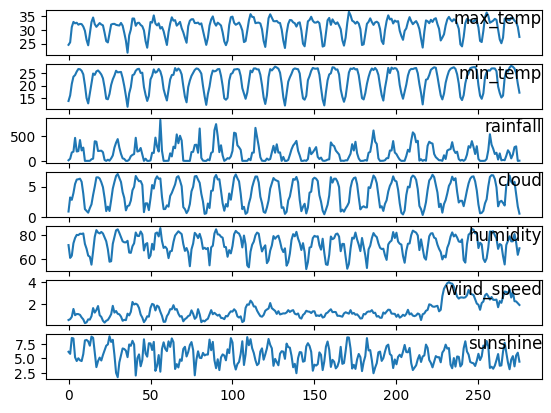

Rajshahi


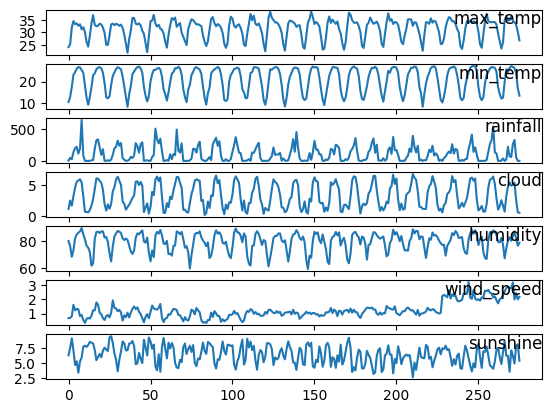

Mymensingh


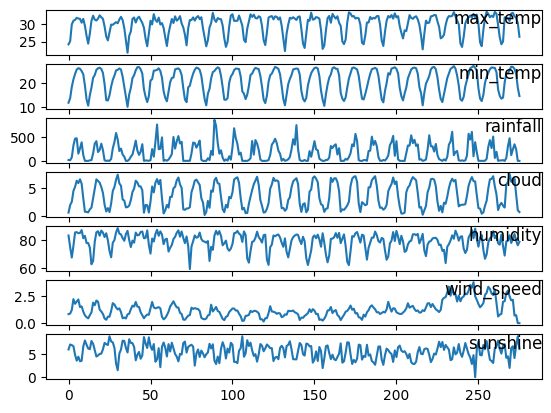

Khulna


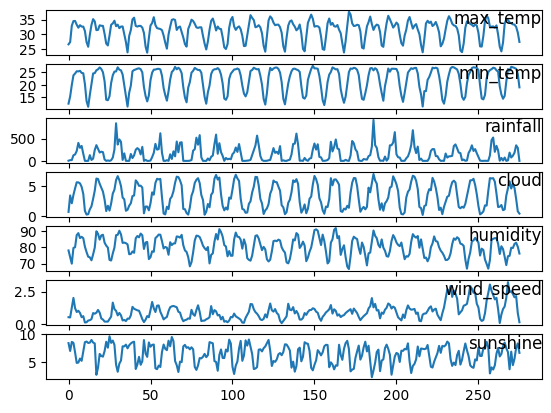

Chittagong


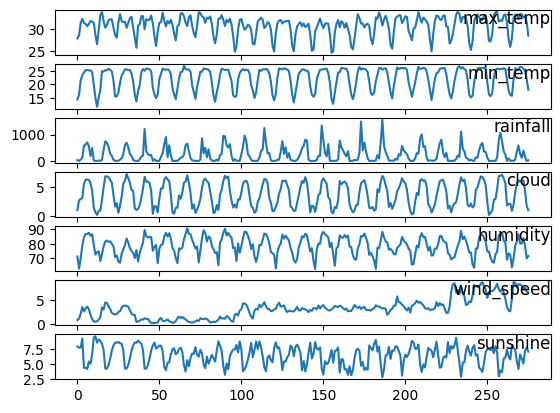

Barisal


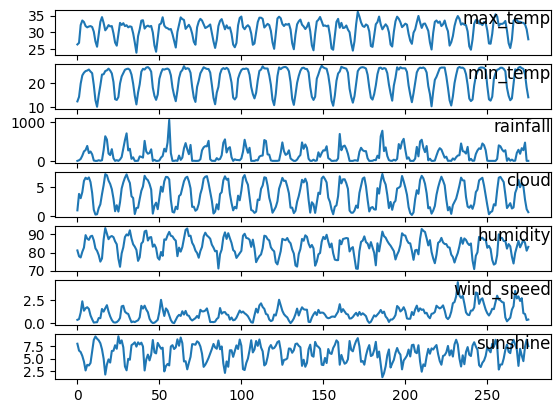

Sylhet


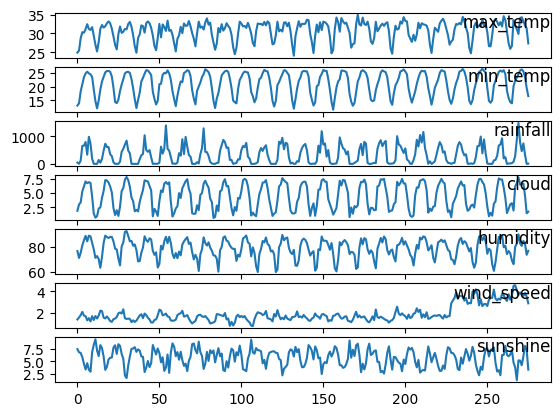

Rangpur


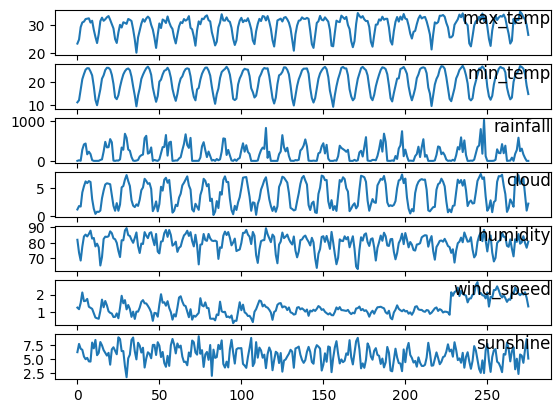

In [ ]:

for city in [dhaka,rajshahi,mymensingh,khulna,chittagong,barisal,sylhet,rangpur]:
    print(city['station'].iloc[0])
    values = city.values
    # specify columns to plot
    groups =  [2, 3, 4, 5, 6, 7, 8]
    i = 1
    # plot each column
    pyplot.figure()
    for group in groups:
      if group < len(dataset.columns):
         pyplot.subplot(len(groups), 1, i)
         pyplot.plot(values[:, group])
         pyplot.title(dataset.columns[group], y=0.5, loc='right')
         i += 1

    pyplot.show()

In [ ]:
def get_year(x):
  return x[:4]

def get_month(x):
  return x[5:7]

In [ ]:
dataset['year'] = dataset['date'].apply(lambda x: get_year(str(x)))
dataset['month'] = dataset['date'].apply(lambda x: get_month(str(x)))

In [ ]:
dataset['month']

0       01
1       02
2       03
3       04
4       05
        ..
2203    08
2204    09
2205    10
2206    11
2207    12
Name: month, Length: 2208, dtype: object

In [ ]:
temp_year = pd.crosstab(dataset['year'], dataset['month'], values=dataset['max_temp'], aggfunc='mean')

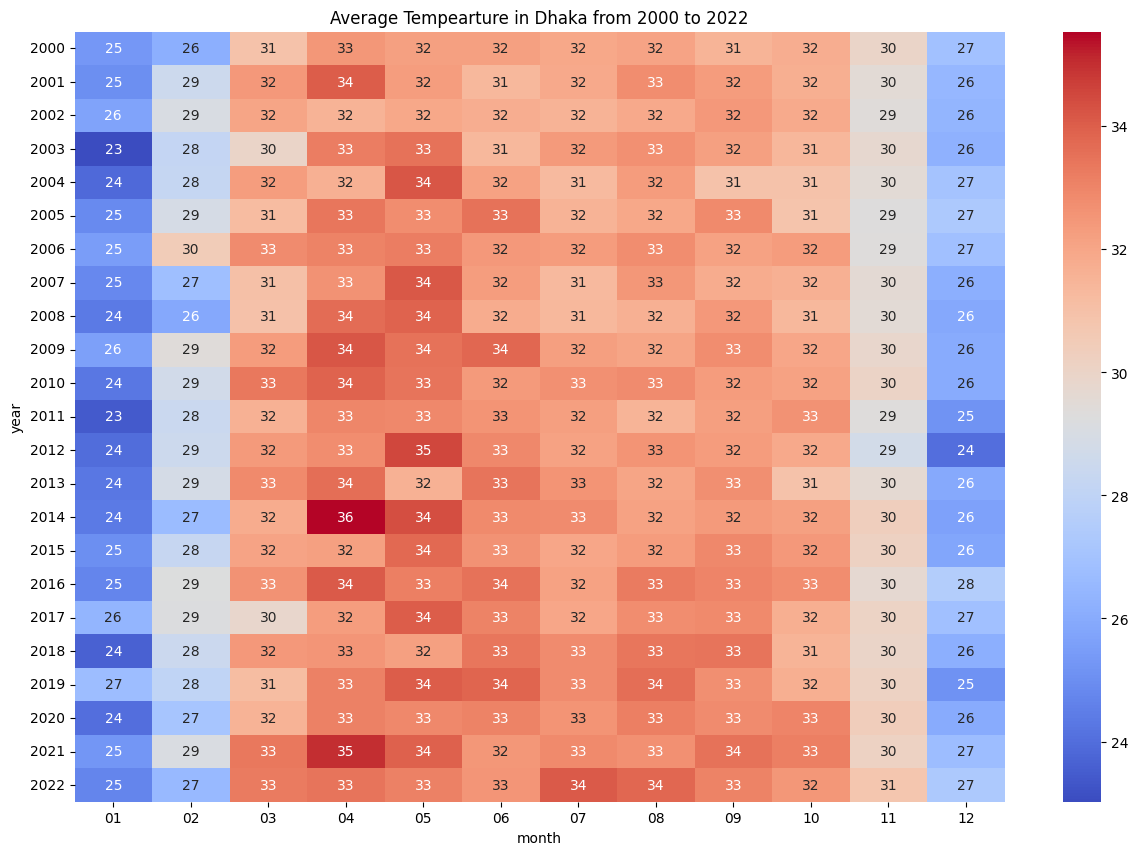

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Dhaka from 2000 to 2022")
plt.show()

In [ ]:
humidity_year = pd.crosstab(dataset['year'], dataset['month'], values=dataset['humidity'], aggfunc='mean')

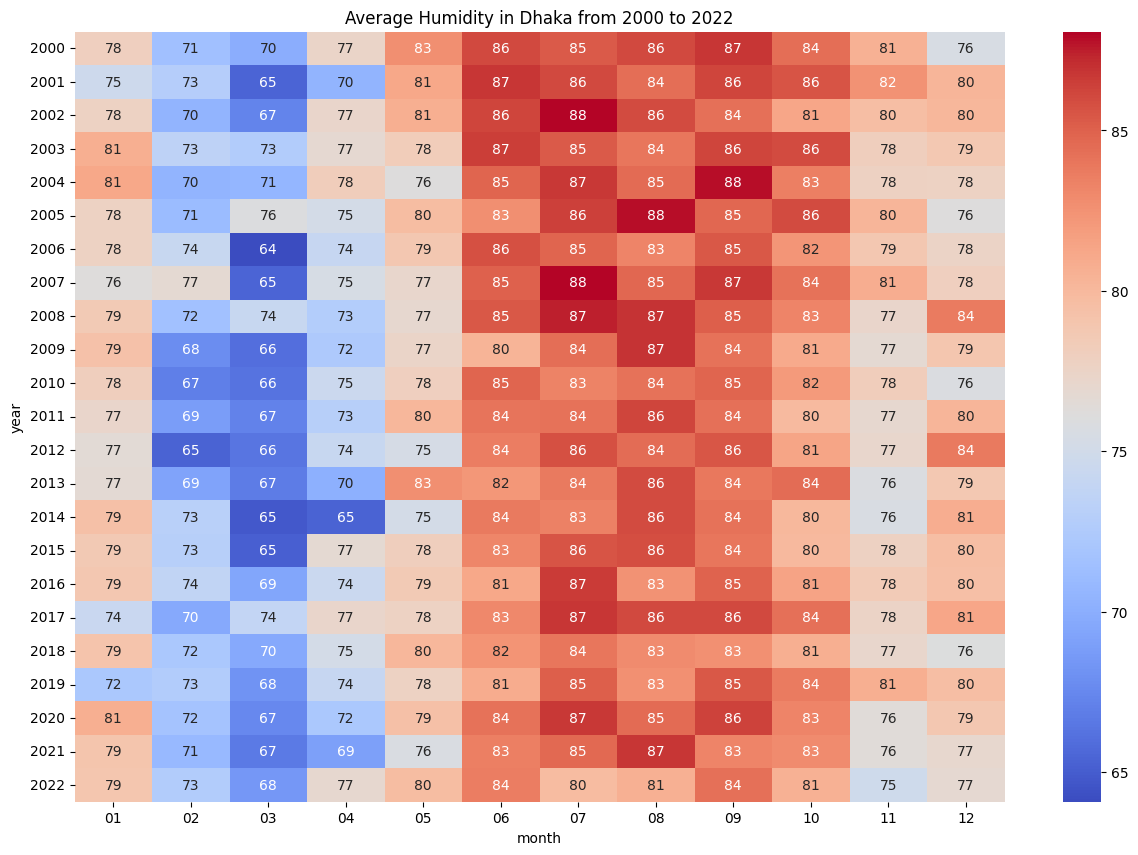

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Dhaka from 2000 to 2022")
plt.show()

In [ ]:
rainfall_year = pd.crosstab(dataset['year'], dataset['month'], values=dataset['rainfall'], aggfunc='mean')

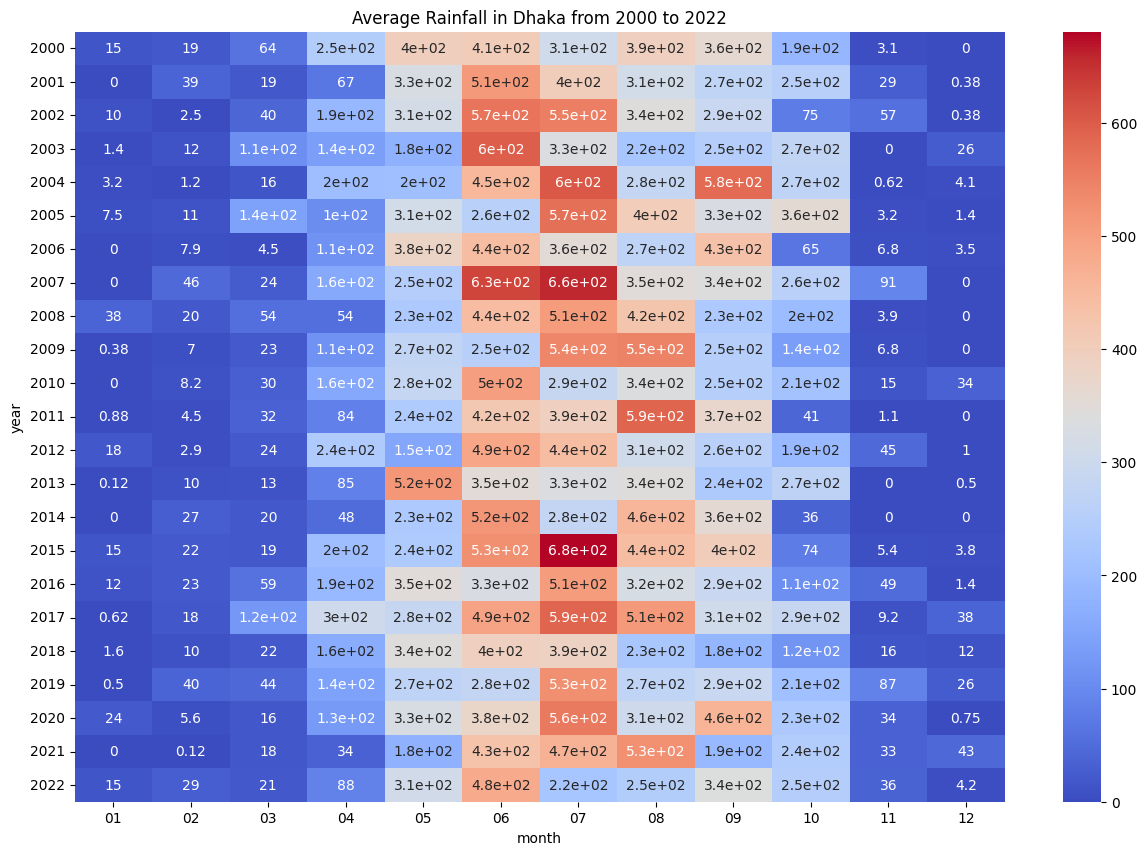

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(rainfall_year, cmap='coolwarm', annot=True)
plt.title("Average Rainfall in Dhaka from 2000 to 2022")
plt.show()

In [ ]:
def preprocess_data(city_data):
    city_data = city_data.set_index('date').drop(columns=['station'])


    # Normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    datasetScaled = scaler.fit_transform(dataset)



    return trainDatasetX, testDatasetX, trainDatasetY, testDatasetY, scaler, datasetScaled
